# Waste Image Classification Inference

---
## I. Introduction



Nama : Manas Pnadey(Aranav)  
Dataset : [Real Waste Dataset](https://archive.ics.uci.edu/dataset/908/realwaste)  
Hugging Face : [Link](https://huggingface.co/spaces/amariayudha/RealWaste_Prediction_Deep_Learning)
  
Objective :  The objective of this project is to develop a **deep learning model**, specifically a Convolutional Neural Network (CNN), to classify waste images into different categories of materials, using **accuracy** as the evaluation metric. This aims to assist in automating waste sorting processes, enhancing recycling efficiency, and promoting environmental sustainability. Manual waste sorting is inefficient, leading to low recycling rates and increased environmental harm. Our goal is to develop a deep learning-based waste classification system using a Convolutional Neural Network (CNN) that can accurately classify at least **70% (accuracy)** of waste images across 9 material categories within a 12-week timeframe. The project aims to improve waste management efficiency and environmental sustainability.

---

## II. Libraries

The libraries used to test the model are as follows:

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import random


Next, we will check if TensorFlow is using GPU

In [2]:
# Check if TensorFlow is using GPU
print("Is TensorFlow using GPU:", tf.test.is_built_with_cuda())

# List available GPUs
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

# Set TensorFlow to use GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Is TensorFlow using GPU: True
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Also we should set a fixed random seed here too

In [3]:
# Set a fixed random seed
random.seed(42)
np.random.seed(42)

## III. Data Loading

Here, we load the saved model and define the class names. After that, we load the image that we want to predict.


In [4]:
# Load the saved model
model = load_model('transfer_learning_model.h5',compile=False)

# Define the class names
classes = ["Cardboard", "Food Organics", "Glass", "Metal", "Miscellaneous Trash", "Paper", "Plastic", "Textile Trash", "Vegetation"]

# Function to preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(299, 299))
    img_array = img_to_array(img)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [5]:
def predict_waste(image_path):
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    
    # Make prediction
    prediction = model.predict(processed_image)
    
    # Get the predicted class
    predicted_class = classes[np.argmax(prediction)]
    
    # Get the confidence
    confidence = np.max(prediction) * 100
    
    return predicted_class, confidence

# Test the model on a few sample images
sample_images = [
    "deployment/visualization/cig_package.jpg",
    "deployment/visualization/organic_eggs.jpg",
    "deployment/visualization/textile_shoes.jpg",
    "deployment/visualization/water_bottle.jpg",
    "deployment/visualization/uno.jpg"
]

## IV. Model Prediction

Next, we do prediction for each image, and display the image, the predicted class, and the confidence level.

1/1 [==============================] - 3s 3s/step


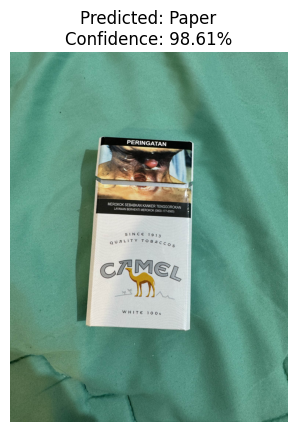

Image: deployment/visualization/cig_package.jpg
Predicted class: Paper
Confidence: 98.61%
--------------------
1/1 [==============================] - 0s 25ms/step


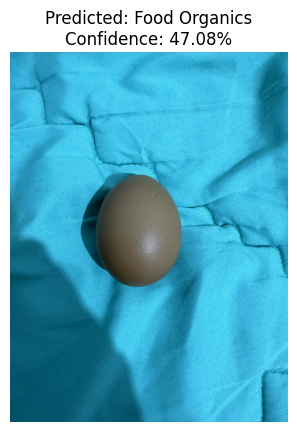

Image: deployment/visualization/organic_eggs.jpg
Predicted class: Food Organics
Confidence: 47.08%
--------------------
1/1 [==============================] - 0s 24ms/step


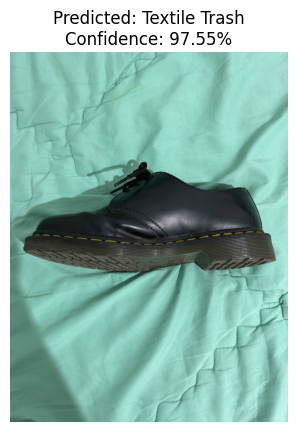

Image: deployment/visualization/textile_shoes.jpg
Predicted class: Textile Trash
Confidence: 97.55%
--------------------
1/1 [==============================] - 0s 32ms/step


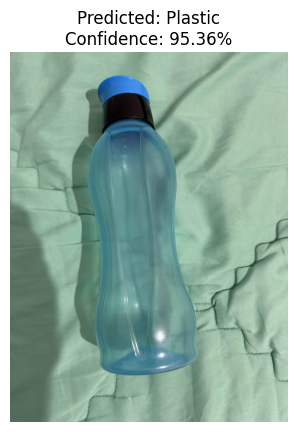

Image: deployment/visualization/water_bottle.jpg
Predicted class: Plastic
Confidence: 95.36%
--------------------
1/1 [==============================] - 0s 17ms/step


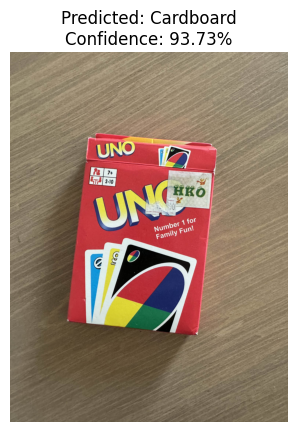

Image: deployment/visualization/uno.jpg
Predicted class: Cardboard
Confidence: 93.73%
--------------------


In [6]:
# Do prediction for each image
for img_path in sample_images:
    predicted_class, confidence = predict_waste(img_path)
    
    # Display the image
    img = load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.show()
    
    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")
    print("--------------------")


## V. Conclusion

The model demonstrates its ability to classify waste images into the 9 predefined categories. It provides both the predicted class and the confidence level for each prediction. This showcases the model's potential for real-world application in automated waste sorting systems. Using our 5 inference images taken. Our model able to predict from new unseen data the model able to predict 4/5 of the images correctly. Where the model predicted 1/5 of the images incorrectly.

The image that the model predicted correctly are a shoes made out of textile, egg shell as a food organics, a bottle of water made out of plastic, and uno card package made out of cardboard. While the image that the model predicted incorrectly is pack of ciggarete made out of cardboard (this could happen since the color of the package is white, simillar to how paper color is and the shaped of the package) and stella which .

Key observations:
1. The model successfully classifies various waste items across different categories.
2. Confidence levels vary, which can be useful for setting thresholds in practical applications.
3. Some misclassifications may occur, especially for items that share similar visual characteristics across categories.

These results indicate that the model can be a valuable tool in improving waste management efficiency and environmental sustainability. However, it's important to note that the model's performance should be continuously monitored and improved with more diverse real-world data for optimal results in practical settings.

Hugging Face : [Link](https://huggingface.co/spaces/amariayudha/RealWaste_Prediction_Deep_Learning)